# Модульное домашнее задание №1
## по курсу «Основы статистических наблюдений» (формат «10»)

Выполнил Ярёменко Степан БЭК 251


# Пространственные данные

Для этих целей возьмём ВВП по странам за 2022 год.

В качестве источника пространственных данных возьмём ВВП по странам с сайта  [worldbank.org](https://www.worldbank.org/ext/en/home):

https://wits.worldbank.org/CountryProfile/en/country/by-country/startyear/ltst/endyear/ltst/indicator/NY-GDP-MKTP-CD

Эти же данные в формате csv есть на
https://www.kaggle.com/datasets/alejopaullier/-gdp-by-country-1999-2022?resource=download

Обработаем нарушения синтаксиса данных (кавычки, запятые вместо точек) и "чистый" датасет зальём на наш [репозиторий](https://github.com/sayaryomenko/statistic/tree/main/data) для дальнейшей подгрузки.

In [77]:
import pandas as pd

# Читаем весь датасет по ВВП за 1999-2022 годы
url = 'https://raw.githubusercontent.com/sayaryomenko/statistic/refs/heads/main/data/GDP-by-Country-1999-2022.csv'

dataset = pd.read_csv(url)

print(dataset.head())

               Country    1999    2000    2001    2002    2003    2004  \
0          Afghanistan   0.000   0.000   0.000   4.084   4.585   5.971   
1              Albania   3.444   3.695   4.096   4.456   5.600   7.452   
2              Algeria  48.845  54.749  55.181  57.053  68.013  85.016   
3               Angola   6.153   9.135   8.936  11.386  13.956  19.800   
4  Antigua and Barbuda   0.652   0.678   0.710   0.718   0.754   0.818   

      2005     2006     2007  ...     2013     2014     2015     2016  \
0    7.309    8.399    9.892  ...   21.555   24.304    0.000    0.000   
1    8.376    9.133   10.163  ...   14.910   16.053   11.591   12.204   
2  102.380  114.322  116.158  ...  190.432  203.449  175.077  181.710   
3   30.632   43.759   55.370  ...  136.415  151.089  102.011   98.815   
4    0.875    0.962    1.026  ...    1.404    1.494    1.285    1.328   

      2017     2018     2019     2020     2021     2022  
0    0.000    0.000    0.000    0.000    0.000    0.000  


In [78]:
# Берём для исследования только данные за 2022 год
data = dataset[('2022')]
data.head()

,2022
0,0.000
1,18.012
2,168.195
3,74.953
4,1.534
...,...
175,43.546
176,415.493
177,0.000
178,23.967


In [60]:
# @title Метрики распределения
import numpy as np
from scipy.stats import skew, kurtosis

print('Минимальное значение (x_min) =', data.min())
print('Максимальное значение (x_max) =', data.max())
print('Размах (R) =', data.max() - data.min())
print('Среднее значение (mean) =', data.mean())
print('Мода (mode) =', data.mode()[0])
print('Медиана (median) =', data.median())
print('Дисперсия (variance) =', data.var())
print('Стандартное отклонение (СКО, std) =', data.std())
print('Первый квартиль (Q1) =', data.quantile(0.25))
print('Третий квартиль (Q3) =', data.quantile(0.75))
print('Интерквартильный размах (IQR) =', data.quantile(0.75) - data.quantile(0.25))
print('Коэффициент вариации =', data.std() / data.mean())
print('Коэффициент асимметрии (skewness) =', skew(data))
print('Коэффициент эксцесса (kurtosis) =', kurtosis(data))

Минимальное значение (x_min) = 0.0
Максимальное значение (x_max) = 24796.08
Размах (R) = 24796.08
Среднее значение (mean) = 556.7953555555555
Мода (mode) = 0.0
Медиана (median) = 40.186
Дисперсия (variance) = 5702244.923001037
Стандартное отклонение (СКО, std) = 2387.937378366744
Первый квартиль (Q1) = 8.885000000000002
Третий квартиль (Q3) = 305.18025
Интерквартильный размах (IQR) = 296.29525
Коэффициент вариации = 4.288716409970991
Коэффициент асимметрии (skewness) = 8.31903412812399
Коэффициент эксцесса (kurtosis) = 74.5777857967683


In [61]:
# @title Выбросы в исходном ряду
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Усечки для выбросов
lower_fence_1_5 = Q1 - 1.5 * IQR
upper_fence_1_5 = Q3 + 1.5 * IQR
lower_fence_3 = Q1 - 3 * IQR
upper_fence_3 = Q3 + 3 * IQR

# Выбросы (classic boxplot definition)
outliers_1_5 = data[(data < lower_fence_1_5) | (data > upper_fence_1_5)]
outliers_3 = data[(data < lower_fence_3) | (data > upper_fence_3)]

print('Q1 =', Q1)
print('Q3 =', Q3)
print('IQR =', IQR)
print('Ус (-) для 1.5*IQR =', lower_fence_1_5)
print('Ус (+) для 1.5*IQR =', upper_fence_1_5)
print('Ус (-) для 3*IQR =', lower_fence_3)
print('Ус (+) для 3*IQR =', upper_fence_3)
print('Выбросы (1.5*IQR), штук =', len(outliers_1_5))
print('Выбросы (3*IQR), штук =', len(outliers_3))


Q1 = 8.885000000000002
Q3 = 305.18025
IQR = 296.29525
Ус (-) для 1.5*IQR = -435.557875
Ус (+) для 1.5*IQR = 749.6231250000001
Ус (-) для 3*IQR = -880.00075
Ус (+) для 3*IQR = 1194.066
Выбросы (1.5*IQR), штук = 21
Выбросы (3*IQR), штук = 16


In [62]:
# @title Вывод стран-выбросов по критерию 3*IQR
outliers_3_named = dataset.loc[(dataset['2022'] < lower_fence_3) | (dataset['2022'] > upper_fence_3), ['Country', '2022']]
print(outliers_3_named)

            Country      2022
7         Australia   1677.45
22           Brazil   1810.61
29           Canada   2189.79
34            China  18463.13
57           France   3140.03
61          Germany   4557.35
74            India   3250.08
75        Indonesia   1247.35
79            Italy   2272.27
81            Japan   5383.68
86            Korea   1907.66
106          Mexico   1371.64
131          Russia   1703.53
145           Spain   1570.91
170  United Kingdom   3442.21
171   United States  24796.08


In [80]:
# @title Интервальный ряд

n = len(data)
xmin = data.min()
xmax = data.max()

# Кол-во интервалов по формуле Стёрджеса
k = int(1 + 3.322 * np.log10(n))
h = (xmax - xmin) / k

bin_edges = np.arange(xmin, xmax + h, h)  # Границы интервалов
freq, _ = np.histogram(data, bins=bin_edges)  # Частоты

mid_points = (bin_edges[:-1] + bin_edges[1:]) / 2  # Середины интервалов
cum_freq = np.cumsum(freq)  # Накопленная частота

mean = data.mean()

# Вычисления для столбцов с степенями отклонений
diff = mid_points - mean
col2 = diff**2 * freq
col3 = diff**3 * freq
col4 = diff**4 * freq

# Формируем таблицу
table = pd.DataFrame({
    'Интервалы': [f"[{round(bin_edges[i],1)}; {round(bin_edges[i+1],1)})" for i in range(len(freq))],
    'Частота': freq,
    'Середины интервалов': mid_points,
    'Накопленная частота': cum_freq,
    '(x - среднее)^2 * f': col2,
    '(x - среднее)^3 * f': col3,
    '(x - среднее)^4 * f': col4,
})

print('h =', round(h, 3))
display(table)

h = 3099.51


,Интервалы,Частота,Середины интервалов,Накопленная частота,(x - среднее)^2 * f,(x - среднее)^3 * f,(x - среднее)^4 * f
0,[0.0; 3099.5),173,1549.755,173,1.705726e+08,1.693717e+11,1.681793e+14
1,[3099.5; 6199.0),5,4649.265,178,8.374154e+07,3.427097e+11,1.402529e+15
2,[6199.0; 9298.5),0,7748.775,178,0.000000e+00,0.000000e+00,0.000000e+00
3,[9298.5; 12398.0),0,10848.285,178,0.000000e+00,0.000000e+00,0.000000e+00
4,[12398.0; 15497.6),0,13947.795,178,0.000000e+00,0.000000e+00,0.000000e+00
5,[15497.6; 18597.1),1,17047.305,179,2.719369e+08,4.484378e+12,7.394968e+16
6,[18597.1; 21696.6),0,20146.815,179,0.000000e+00,0.000000e+00,0.000000e+00
7,[21696.6; 24796.1),1,23246.325,180,5.148148e+08,1.168090e+13,2.650342e+17


Text(0, 0.5, 'Частота')

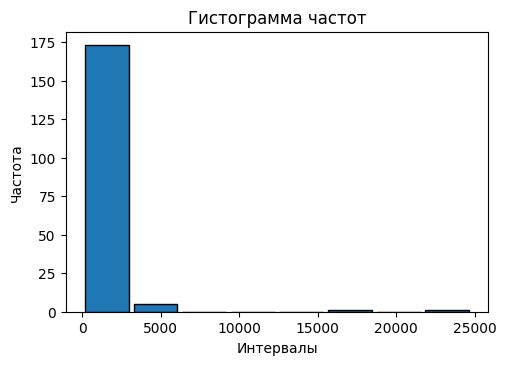

In [64]:
# @title Пробуем построить гистограмму
import matplotlib.pyplot as plt

# Сортируем сходные данные
data_sorted = data.sort_values()

# Частоты и относительные частоты по интервалам
rel_freq = freq / n
cum_rel_freq = cum_freq / n

# Построение гистограммы частот
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.bar(mid_points, freq, width=h * 0.9, edgecolor='black', align='center')
plt.title('Гистограмма частот')
plt.xlabel('Интервалы')
plt.ylabel('Частота')

Мы видим, что нашей гистограммы большие проблемы:

Диапазон ВВП слишком большой — значения стран варьируются от миллионов до десятков триллионов долларов и из-за этого распределение получается очень скошенным.

Используется линейная шкала, из-за чего выбросы (США, Китай и т.д.) «вытягивают» ось.

Без логарифма почти все страны сгрудились в первых интервалах, а несколько богатейших «вытянули» шкалу, делая остальные различия невидимыми.

Поэтому попробуем использовать логарифмическую шкалу.

ВВП различается в сотни раз между странами — значит, применим `np.log10(data)`:

In [79]:
# Используем логарифмированные данные
log_data = np.log10(data[data > 0])

n = len(log_data)
xmin = log_data.min()
xmax = log_data.max()

# Формула Стерджеса
k = int(1 + 3.322 * np.log10(n))
h = (xmax - xmin) / k

bin_edges = np.arange(xmin, xmax + h, h)
freq, _ = np.histogram(log_data, bins=bin_edges)
mid_points = (bin_edges[:-1] + bin_edges[1:]) / 2
cum_freq = np.cumsum(freq)

mean = log_data.mean()

diff = mid_points - mean
col2 = diff**2 * freq
col3 = diff**3 * freq
col4 = diff**4 * freq

table = pd.DataFrame({
    'Интервалы (log10)': [f"[{round(bin_edges[i],2)}; {round(bin_edges[i+1],2)})" for i in range(len(freq))],
    'Частота': freq,
    'Середины интервалов (log10)': mid_points,
    'Накопленная частота': cum_freq,
    '(x - среднее)^2 * f': col2,
    '(x - среднее)^3 * f': col3,
    '(x - среднее)^4 * f': col4,
})

print('h =', round(h, 3))
display(table)


h = 0.626


,Интервалы (log10),Частота,Середины интервалов (log10),Накопленная частота,(x - среднее)^2 * f,(x - среднее)^3 * f,(x - среднее)^4 * f
0,[-0.61; 0.01),6,-0.298008,6,25.260831,-51.831743,106.351594
1,[0.01; 0.64),18,0.327644,24,36.613353,-52.218333,74.474312
2,[0.64; 1.27),27,0.953296,51,17.304112,-13.852944,11.090085
3,[1.27; 1.89),46,1.578948,97,1.407234,-0.246133,0.043050
4,[1.89; 2.52),25,2.204601,122,5.079305,2.289478,1.031974
5,[2.52; 3.14),28,2.830253,150,32.441739,34.920236,37.588086
6,[3.14; 3.77),12,3.455905,162,34.763712,59.169594,100.709637
7,[3.77; 4.39),2,4.081557,164,10.836399,25.223915,58.713773


Теперь гистограмма станет показывать реальные кластеры стран (бедные, средние, богатые), а не просто одну «гору слева».

# Графики

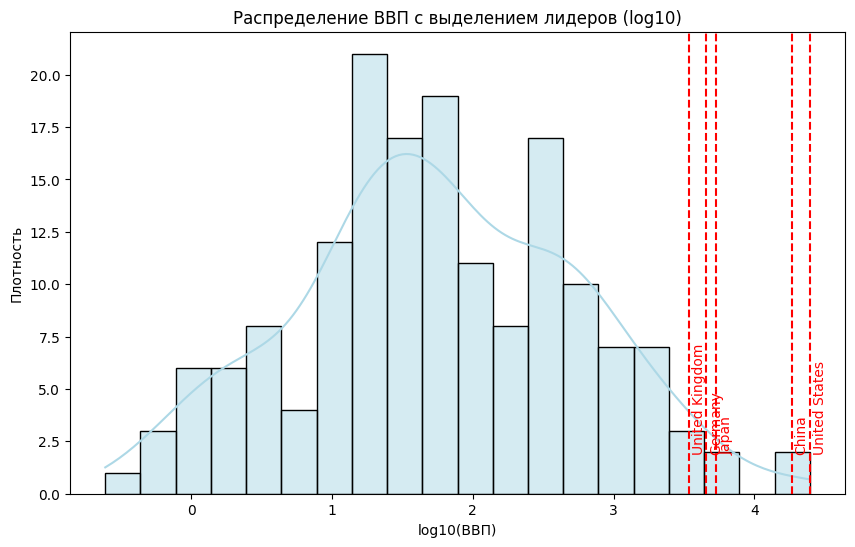

In [66]:
# @title 1. Гистограмма частот
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Логарифмируем данные
log_data = np.log10(data[data > 0])  # уберём нули и отрицательные, если вдруг есть

# Чтобы сделать график «живее», добавим крупнейшие ВВП
top_countries = dataset[['Country', '2022']].sort_values('2022', ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.histplot(log_data, bins=20, kde=True, color='lightblue')
for _, row in top_countries.iterrows():
    plt.axvline(np.log10(row['2022']), color='red', linestyle='--')
    plt.text(np.log10(row['2022'])+0.02, 2, row['Country'], rotation=90, color='red')
plt.title('Распределение ВВП с выделением лидеров (log10)')
plt.xlabel('log10(ВВП)')
plt.ylabel('Плотность')
plt.show()


Text(0, 0.5, 'Относительная частота')

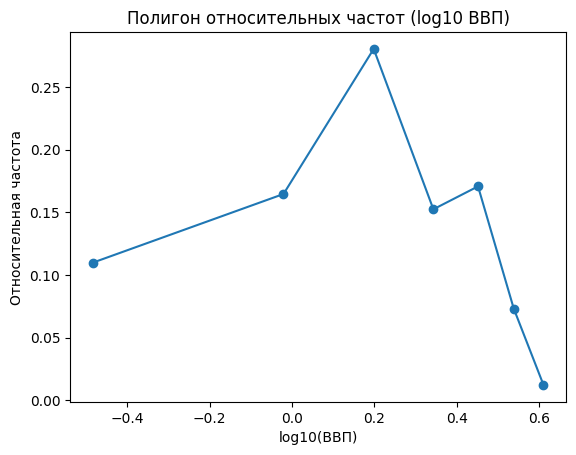

In [67]:
# @title 2. Полигон относительных частот
# Частоты и относительные частоты по интервалам
rel_freq = freq / n
cum_rel_freq = cum_freq / n

plt.plot(np.log10(mid_points[mid_points>0]), rel_freq[mid_points>0], marker='o', linestyle='-')
plt.title('Полигон относительных частот (log10 ВВП)')
plt.xlabel('log10(ВВП)')
plt.ylabel('Относительная частота')

Text(0, 0.5, 'Накопленная относительная частота')

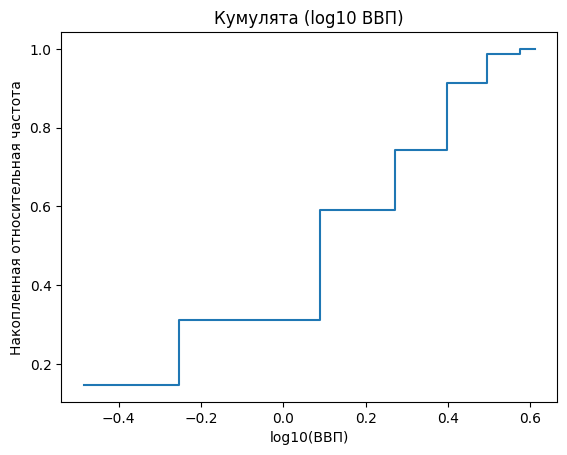

In [68]:
# @title 3. Кумулята (накопленная относительная частота)
plt.step(np.log10(mid_points[mid_points>0]), cum_rel_freq[mid_points>0], where='mid')
plt.title('Кумулята (log10 ВВП)')
plt.xlabel('log10(ВВП)')
plt.ylabel('Накопленная относительная частота')

Ранжированные данные отобразим `без логарифмирования`. Здесь как раз нужно видеть реальную диспропорцию.

В логарифме потеряется ощущение того, насколько огромен разрыв между странами.

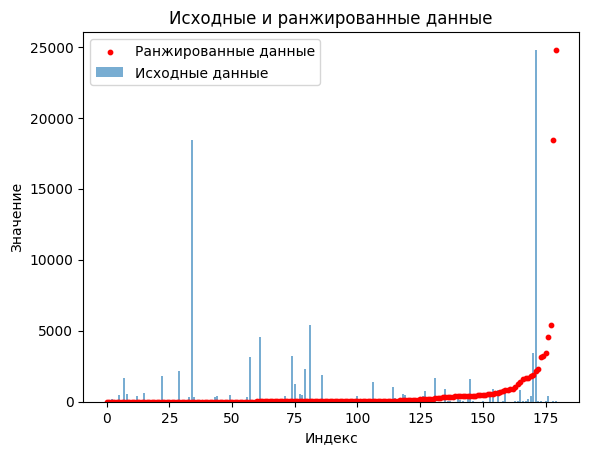

In [69]:
# @title Ранжированные данные
# Здесь отказываемся от логарифмирования
# Сортируем исходные данные for plotting
data_sorted_for_plot = data.sort_values().reset_index(drop=True)

plt.bar(range(len(data)), data, alpha=0.6, label='Исходные данные')
plt.scatter(range(len(data_sorted_for_plot)), data_sorted_for_plot, color='red', s=10, label='Ранжированные данные')
plt.title('Исходные и ранжированные данные')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()

# Временные данные
Для этих целей наш предыдущий датасет не годится (требование 30 уровней и более).

Поэтому возьмём данные с меньшим выбором по странам, но с большим временным интервалом: Countries GDP 1960-2020. Файл csv берём на kaggle:

https://www.kaggle.com/datasets/rinichristy/countries-gdp-19602020?utm_source=chatgpt.com&select=Countries+GDP+1960-2020.csv

и опять заливаем в [репозиторий](https://github.com/sayaryomenko/statistic/tree/main/data) нашего проекта.

In [70]:
import pandas as pd

# Читаем весь датасет по ВВП за 1960-2020 годы
url = 'https://raw.githubusercontent.com/sayaryomenko/statistic/refs/heads/main/data/Countries%20GDP%201960-2020.csv'

ds = pd.read_csv(url)

print(ds.head(2))

                  Country Name Country Code          1960          1961  \
0  Africa Eastern and Southern          AFE  1.931311e+10  1.972349e+10   
1   Africa Western and Central          AFW  1.040428e+10  1.112805e+10   

           1962          1963          1964          1965          1966  \
0  2.149392e+10  2.573321e+10  2.352744e+10  2.681057e+10  2.915216e+10   
1  1.194335e+10  1.267652e+10  1.383858e+10  1.486247e+10  1.583285e+10   

           1967  ...          2011          2012          2013          2014  \
0  3.017317e+10  ...  9.430000e+11  9.510000e+11  9.640000e+11  9.850000e+11   
1  1.442643e+10  ...  6.710000e+11  7.280000e+11  8.210000e+11  8.650000e+11   

           2015          2016          2017          2018          2019  \
0  9.200000e+11  8.730000e+11  9.850000e+11  1.010000e+12  1.010000e+12   
1  7.610000e+11  6.910000e+11  6.840000e+11  7.420000e+11  7.950000e+11   

           2020  
0  9.210000e+11  
1  7.850000e+11  

[2 rows x 63 columns]


In [82]:
# Фильтруем строку для Китая
china_row = ds[ds['Country Name'] == 'China']

# Берём только годы (1960–2020)
years = [str(y) for y in range(1960, 2021)]
china = china_row[years].values.flatten().tolist()

print(china[:5])

[59716467625.0, 50056868958.0, 47209359006.0, 50706799903.0, 59708343489.0]


In [72]:
# @title Метрики распределения
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Превращаем список в Series для удобства
china_gdp = pd.Series(china)

print('Минимальное значение (x_min) =', china_gdp.min())
print('Максимальное значение (x_max) =', china_gdp.max())
print('Размах (R) =', china_gdp.max() - china_gdp.min())
print('Среднее значение (mean) =', china_gdp.mean())
print('Мода (mode) =', china_gdp.mode()[0])
print('Медиана (median) =', china_gdp.median())
print('Дисперсия (variance) =', china_gdp.var())
print('Стандартное отклонение (СКО, std) =', china_gdp.std())
print('Первый квартиль (Q1) =', china_gdp.quantile(0.25))
print('Третий квартиль (Q3) =', china_gdp.quantile(0.75))
print('Интерквартильный размах (IQR) =', china_gdp.quantile(0.75) - china_gdp.quantile(0.25))
print('Коэффициент вариации =', china_gdp.std() / china_gdp.mean())
print('Коэффициент асимметрии (skewness) =', skew(china_gdp))
print('Коэффициент эксцесса (kurtosis) =', kurtosis(china_gdp))

Минимальное значение (x_min) = 47209359006.0
Максимальное значение (x_max) = 14700000000000.0
Размах (R) = 14652790640994.0
Среднее значение (mean) = 2576957252390.3276
Мода (mode) = 47209359006.0
Медиана (median) = 361000000000.0
Дисперсия (variance) = 1.7804006467061449e+25
Стандартное отклонение (СКО, std) = 4219479407114.277
Первый квартиль (Q1) = 150000000000.0
Третий квартиль (Q3) = 2290000000000.0
Интерквартильный размах (IQR) = 2140000000000.0
Коэффициент вариации = 1.6373882039371754
Коэффициент асимметрии (skewness) = 1.7358498430672726
Коэффициент эксцесса (kurtosis) = 1.6115109512293113


### Выбросы
Наши данные это ВВП Китая за 1960–2020, то есть временной ряд с ярко выраженным ростом.

ВВП Китая рос экспоненциально, особенно после 1980-х.

Из-за этого формула с IQR почти наверняка посчитает «выбросами» последние годы с высоким ВВП, хотя это реальный тренд, а не ошибка данных.

**Вывод**:

Искать выбросы не будем.

### Интервалы и гистограмма
ВВП Китая растёт экспоненциально (особенно после 1980-х).

Если построить гистограмму по исходным значениям, то большая часть интервалов будет пустая или почти пустая для первых 40 лет. А последние 5–10 лет будут сильно выделяться.

Гистограмма будет неинформативной, почти все столбцы будут «пустыми», кроме верхних.

**Вывод**:

Строить таблицу интервалов и гистограмму не будем.

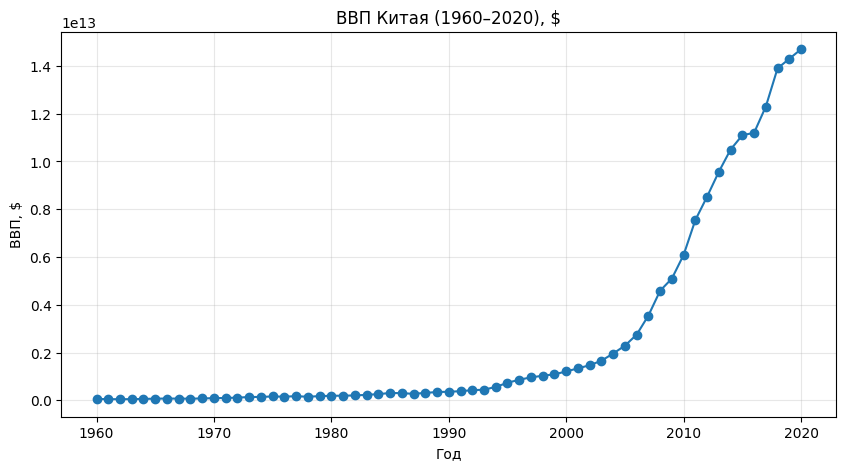

In [73]:
# @title Линейный график ВВП
# Показывает абсолютный рост ВВП по годам.
# Особенность: экспоненциальный рост - график сильно наклонён.
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
plt.plot(range(1960,2021), china_gdp, marker='o')
plt.title('ВВП Китая (1960–2020), $')
plt.xlabel('Год')
plt.ylabel('ВВП, $')
plt.grid(alpha=0.3)
plt.show()

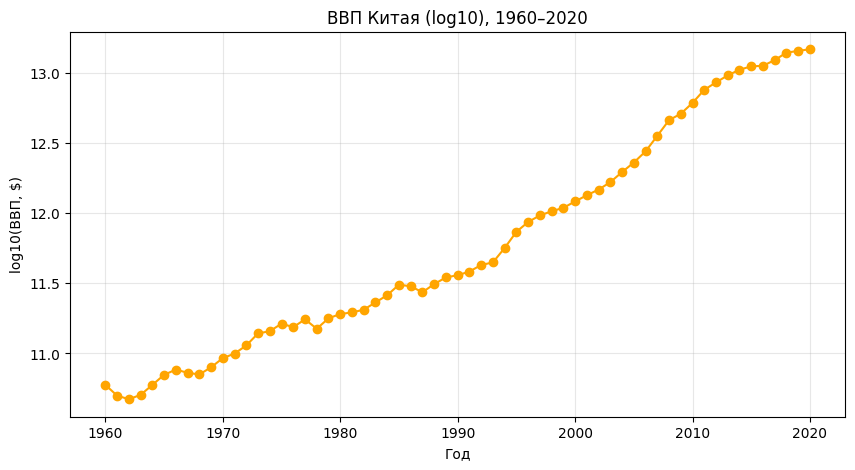

In [74]:
# @title Логарифмический график ВВП
# Рост в относительных масштабах (линейный тренд, если рост экспоненциальный).
# Хорошо видно ускорения и замедления роста.
import matplotlib.pyplot as plt


import numpy as np
log_gdp = np.log10(china_gdp)

plt.figure(figsize=(10,5))
plt.plot(range(1960,2021), log_gdp, marker='o', color='orange')
plt.title('ВВП Китая (log10), 1960–2020')
plt.xlabel('Год')
plt.ylabel('log10(ВВП, $)')
plt.grid(alpha=0.3)
plt.show()

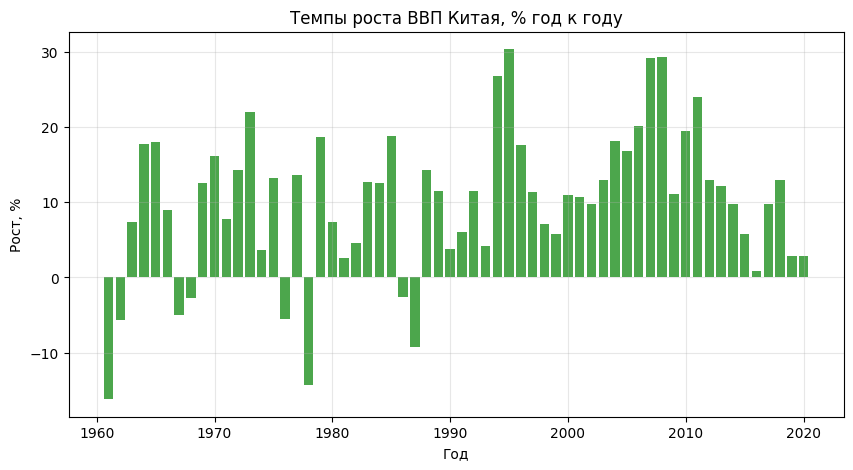

In [75]:
# @title Темпы роста (год к году)
# Процентное изменение ВВП относительно предыдущего года
# Видим экстремальные изменения (спады, кризисы)
gdp_growth = np.diff(china_gdp) / china_gdp[:-1] * 100

plt.figure(figsize=(10,5))
plt.bar(range(1961,2021), gdp_growth, color='green', alpha=0.7)
plt.title('Темпы роста ВВП Китая, % год к году')
plt.xlabel('Год')
plt.ylabel('Рост, %')
plt.grid(alpha=0.3)
plt.show()

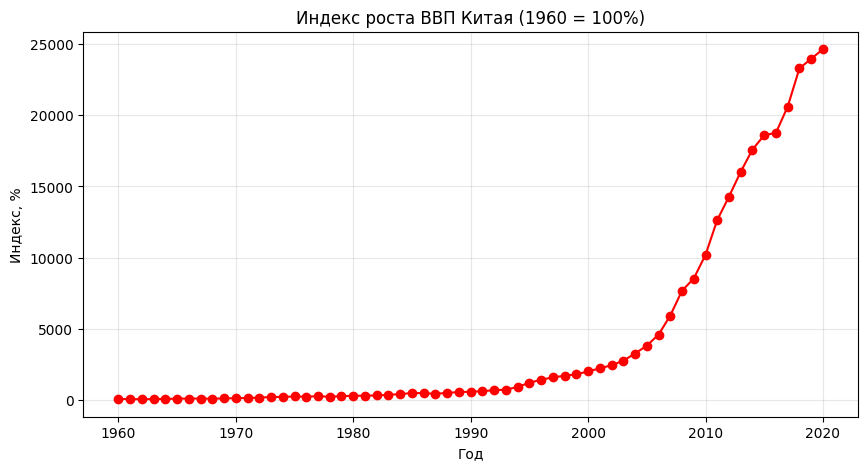

In [76]:
# @title Кумулятивный рост (индекс роста)
# Видим, во сколько раз ВВП увеличился относительно базового года
gdp_index = np.array(china_gdp) / china_gdp[0] * 100

plt.figure(figsize=(10,5))
plt.plot(range(1960,2021), gdp_index, marker='o', color='red')
plt.title('Индекс роста ВВП Китая (1960 = 100%)')
plt.xlabel('Год')
plt.ylabel('Индекс, %')
plt.grid(alpha=0.3)
plt.show()